In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from sympy.stats import *

In [2]:
# assume that we calculate distances between
# k-dim vectors using Euclid
# D = sqrt(sum_i( (X_i - Y_i)**2 ))
# D is chi-squared distributed
# iff X_i ~ N(any, 2**(-0.5))

k = symbols("k", positive=True, integer=True)
X = ChiSquared("X", formk)

# k, theta = symbols(r"k \theta", positive=True, integer=True)
# X = Gamma("X", k, theta)

Y = sqrt(X.copy())

rho = Expectation(X) ** 2 / Variance(X) / 2
rho_orig = rho.subs(X, X)
rho_new = rho.subs(X, Y)
rho_increase = rho_new / rho_orig


rho_increase_subs = rho_increase.subs(
    {
        Expectation(X): E(X),
        Expectation(Y): E(Y),
        Variance(X): variance(X),
        Variance(Y): variance(Y),
    }
)
print(N(simplify(rho_increase_subs)))
simplify(rho_increase_subs)

-2.0*gamma(k/2 + 1/2)**2/(k*gamma(k/2 + 1/2)**2 - 2.0*gamma(k/2 + 1)**2)


-2*gamma(k/2 + 1/2)**2/(k*gamma(k/2 + 1/2)**2 - 2*gamma(k/2 + 1)**2)

In [3]:
solveset(rho_increase_subs > 0, k, S.Integers)

ConditionSet(k, 8*2**(k - 1)*gamma(k/2 + 1/2)**2/(2**k*k*(2*gamma(k/2 + 1)/gamma(k/2) + 4*2**(k/2 - 1)*gamma(k/2 + 1/2)**2/(2**(k/2)*gamma(k/2)**2) - 4*sqrt(2)*2**(k/2 - 1/2)*gamma(k/2 + 1/2)**2/(2**(k/2)*gamma(k/2)**2))*gamma(k/2)**2) > 0, Integers)

In [4]:
rho_increase_subs

8*2**(k - 1)*gamma(k/2 + 1/2)**2/(2**k*k*(2*gamma(k/2 + 1)/gamma(k/2) + 4*2**(k/2 - 1)*gamma(k/2 + 1/2)**2/(2**(k/2)*gamma(k/2)**2) - 4*sqrt(2)*2**(k/2 - 1/2)*gamma(k/2 + 1/2)**2/(2**(k/2)*gamma(k/2)**2))*gamma(k/2)**2)

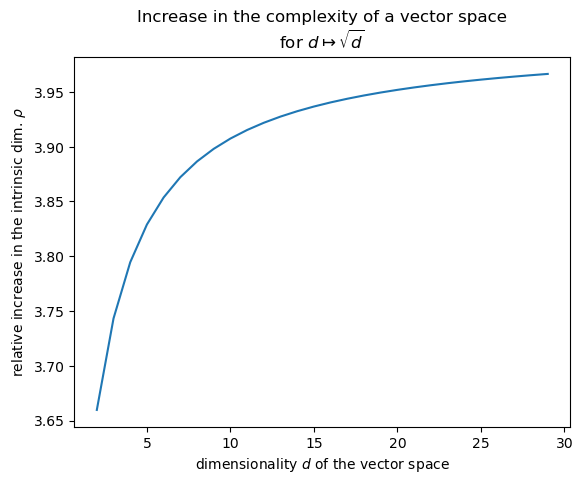

In [5]:
delta = lambdify(k, simplify(rho_increase_subs), "numpy")
x = np.arange(2, 30)
y = [delta(i) for i in x]
plt.plot(x, y)
plt.xlabel("dimensionality $d$ of the vector space")
plt.ylabel(r"relative increase in the intrinsic dim. $\rho$")
plt.title("Increase in the complexity of a vector space\nfor $d\mapsto\sqrt{d}$")
plt.show()